In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("bitcoin.csv", parse_dates=["Date"], index_col="Date")
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    36168 non-null  float64
 1   High    36168 non-null  float64
 2   Low     36168 non-null  float64
 3   Close   36168 non-null  float64
 4   Volume  36168 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [4]:
data.Close / data.Close.shift(1) - 1

Date
2017-08-17 04:00:00         NaN
2017-08-17 05:00:00    0.001506
2017-08-17 06:00:00    0.002093
2017-08-17 07:00:00    0.005929
2017-08-17 08:00:00    0.002460
                         ...   
2021-10-07 05:00:00   -0.006127
2021-10-07 06:00:00   -0.003683
2021-10-07 07:00:00    0.004066
2021-10-07 08:00:00   -0.003974
2021-10-07 09:00:00   -0.009953
Name: Close, Length: 36168, dtype: float64

In [5]:
data["returns"] = np.log(data.Close / data.Close.shift(1))
data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457
...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058


**세가지 전략 파라미터**
* 수익률 임계값: 모든 90 백분위수 이상의 값은 매우 높은 수익률로 분류
* 5와 20 백분위 수 사이의 거래량 변동은 적절하거나 높은 감소로 분류

**전략 파라미터: 90, 5, 20**

In [6]:
data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457
...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058


In [7]:
def backtest(data, parameters, tc):
    # 필요한 값들 준비
    data = data[["Close", "Volume", "returns"]].copy()
    data["vol_ch"] = np.log(data.Volume.div(data.Volume.shift(1)))
    data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
    data.loc[data.vol_ch < -3, "vol_ch"] = np.nan
    
    # 거래 포지션 정의
    return_thresh = np.percentile(data.returns.dropna(), parameters[0])
    cond1 = data.returns >= return_thresh
    volume_thresh = np.percentile(data.vol_ch.dropna(), [parameters[1], parameters[2]])
    cond2 = data.vol_ch.between(volume_thresh[0], volume_thresh[1])
    
    data["position"] = 1
    data.loc[cond1 & cond2, "position"] = 0
    
    # 백테스트
    data["strategy"] = data.position.shift(1) * data["returns"]
    data["trades"] = data.position.diff().fillna(0).abs()
    data.strategy = data.strategy + data.trades * tc
    data["creturns"] = data["returns"].cumsum().apply(np.exp)
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
    
    return data.cstrategy[-1]

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
backtest(data=data, parameters=(90, 5, 20), tc=-0.00085)

19.056162979544915

In [10]:
return_range = range(85, 98, 1)
vol_low_range = range(2, 16, 1)
vol_high_range = range(16, 35, 1)

In [11]:
list(return_range)

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]

**모든 조합으로 백테스트를 하고 최적의 조합을 찾는다**

In [12]:
from itertools import product

In [13]:
combinations = list(product(return_range, vol_low_range, vol_high_range))
combinations

[(85, 2, 16),
 (85, 2, 17),
 (85, 2, 18),
 (85, 2, 19),
 (85, 2, 20),
 (85, 2, 21),
 (85, 2, 22),
 (85, 2, 23),
 (85, 2, 24),
 (85, 2, 25),
 (85, 2, 26),
 (85, 2, 27),
 (85, 2, 28),
 (85, 2, 29),
 (85, 2, 30),
 (85, 2, 31),
 (85, 2, 32),
 (85, 2, 33),
 (85, 2, 34),
 (85, 3, 16),
 (85, 3, 17),
 (85, 3, 18),
 (85, 3, 19),
 (85, 3, 20),
 (85, 3, 21),
 (85, 3, 22),
 (85, 3, 23),
 (85, 3, 24),
 (85, 3, 25),
 (85, 3, 26),
 (85, 3, 27),
 (85, 3, 28),
 (85, 3, 29),
 (85, 3, 30),
 (85, 3, 31),
 (85, 3, 32),
 (85, 3, 33),
 (85, 3, 34),
 (85, 4, 16),
 (85, 4, 17),
 (85, 4, 18),
 (85, 4, 19),
 (85, 4, 20),
 (85, 4, 21),
 (85, 4, 22),
 (85, 4, 23),
 (85, 4, 24),
 (85, 4, 25),
 (85, 4, 26),
 (85, 4, 27),
 (85, 4, 28),
 (85, 4, 29),
 (85, 4, 30),
 (85, 4, 31),
 (85, 4, 32),
 (85, 4, 33),
 (85, 4, 34),
 (85, 5, 16),
 (85, 5, 17),
 (85, 5, 18),
 (85, 5, 19),
 (85, 5, 20),
 (85, 5, 21),
 (85, 5, 22),
 (85, 5, 23),
 (85, 5, 24),
 (85, 5, 25),
 (85, 5, 26),
 (85, 5, 27),
 (85, 5, 28),
 (85, 5, 29),
 (85, 

In [14]:
len(combinations)

3458

In [15]:
13 * 14 * 19

3458

In [16]:
results = []
for comb in combinations:
    results.append(backtest(data=data, parameters=comb, tc=-0.00085))

In [17]:
many_results = pd.DataFrame(data=combinations, columns=["returns", "vol_low", "vol_high"])
many_results["performance"] = results
many_results

,returns,vol_low,vol_high,performance
0,85,2,16,16.531128
1,85,2,17,17.042182
2,85,2,18,18.613172
3,85,2,19,18.607122
4,85,2,20,17.445944
...,...,...,...,...
3453,97,15,30,13.129257
3454,97,15,31,14.376261
3455,97,15,32,13.286913
3456,97,15,33,12.649590


In [18]:
many_results.nlargest(20, "performance")

,returns,vol_low,vol_high,performance
2595,94,12,27,30.049242
2596,94,12,28,29.118324
2329,93,12,27,28.758840
2576,94,11,27,28.607623
2599,94,12,31,28.347644
2865,95,12,31,28.250187
2291,93,10,27,28.126993
2310,93,11,27,28.089283
2861,95,12,27,28.025133
2063,92,12,27,28.011543


In [19]:
many_results.nsmallest(20, "performance")

,returns,vol_low,vol_high,performance
265,85,15,34,8.919101
264,85,15,33,9.454071
261,85,15,30,9.635953
263,85,15,32,9.698984
531,86,15,34,10.086398
1595,90,15,34,10.357921
18,85,2,34,10.499415
37,85,3,34,10.515405
75,85,5,34,10.646851
797,87,15,34,10.731116


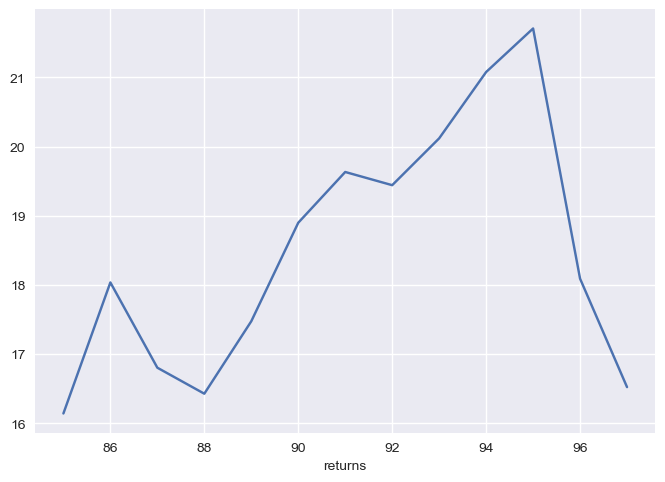

In [20]:
many_results.groupby("returns").performance.mean().plot()
plt.show()

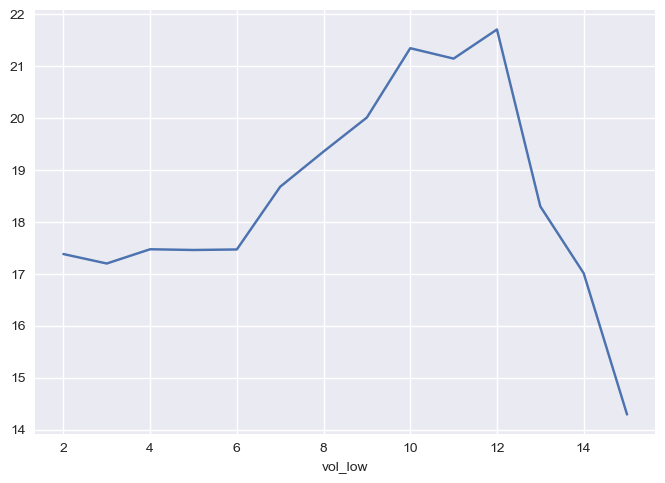

In [21]:
many_results.groupby("vol_low").performance.mean().plot()
plt.show()

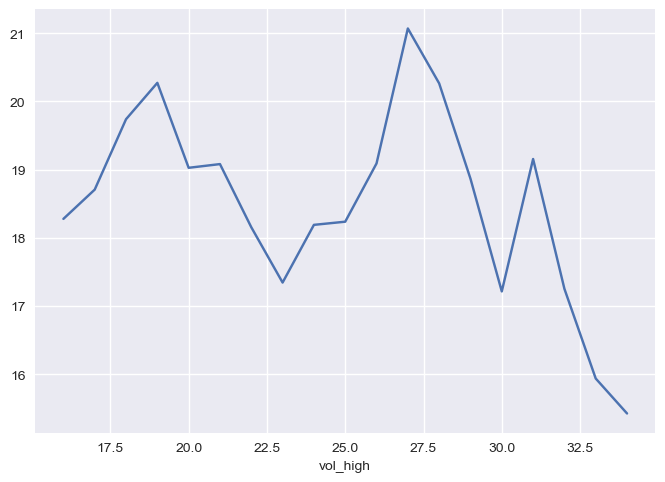

In [22]:
many_results.groupby("vol_high").performance.mean().plot()
plt.show()

In [23]:
backtest(data=data, parameters=(94, 11, 27), tc=-0.00085)

28.607622816622424

In [24]:
backtest(data=data, parameters=(90, 5, 20), tc=-0.00085)

19.056162979544915

In [26]:
class Long_Only_Backtester():
    ''' Class for the vectorized backtesting of simple Long-only trading strategies.
    
    Attributes
    ============
    filepath: str
        local filepath of the dataset (csv-file)
    symbol: str
        ticker symbol (instrument) to be backtested
    start: str
        start date for data import
    end: str
        end date for data import
    tc: float
        proportional trading costs per trade
    
    
    Methods
    =======
    get_data:
        imports the data.
        
    test_strategy:
        prepares the data and backtests the trading strategy incl. reporting (wrapper).
        
    prepare_data:
        prepares the data for backtesting.
    
    run_backtest:
        runs the strategy backtest.
        
    plot_results:
        plots the cumulative performance of the trading strategy compared to buy-and-hold.
        
    optimize_strategy:
        backtests strategy for different parameter values incl. optimization and reporting (wrapper).
    
    find_best_strategy:
        finds the optimal strategy (global maximum).
         
        
    print_performance:
        calculates and prints various performance metrics.
        
    '''    
    
    def __init__(self, filepath, symbol, start, end, tc):
        
        self.filepath = filepath
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        self.tp_year = (self.data.Close.count() / ((self.data.index[-1] - self.data.index[0]).days / 365.25))
        
    def __repr__(self):
        return "Long_Only_Backtester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data.
        '''
        raw = pd.read_csv(self.filepath, parse_dates = ["Date"], index_col = "Date")
        raw = raw.loc[self.start:self.end].copy()
        raw["returns"] = np.log(raw.Close / raw.Close.shift(1))
        self.data = raw
        
    def test_strategy(self, percentiles = None, thresh = None):
        '''
        Prepares the data and backtests the trading strategy incl. reporting (Wrapper).
         
        Parameters
        ============
        percentiles: tuple (return_perc, vol_low_perc, vol_high_perc)
            return and volume percentiles to be considered for the strategy.
            
        thresh: tuple (return_thresh, vol_low_thresh, vol_high_thesh)
            return and volume thresholds to be considered for the strategy.
        '''
        
        self.prepare_data(percentiles = percentiles, thresh = thresh)
        self.run_backtest()
        
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        self.print_performance()
    
    def prepare_data(self, percentiles, thresh):
        ''' Prepares the Data for Backtesting.
        '''
        
        data = self.data[["Close", "Volume", "returns"]].copy()
        data["vol_ch"] = np.log(data.Volume.div(data.Volume.shift(1)))
        data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
        data.loc[data.vol_ch < -3, "vol_ch"] = np.nan        
        
        if percentiles:
            self.return_thresh = np.percentile(data.returns.dropna(), percentiles[0])
            self.volume_thresh = np.percentile(data.vol_ch.dropna(), [percentiles[1], percentiles[2]])
        elif thresh:
            self.return_thresh = thresh[0]
            self.volume_thresh = [thresh[1], thresh[2]]
                
        cond1 = data.returns >= self.return_thresh
        cond2 = data.vol_ch.between(self.volume_thresh[0], self.volume_thresh[1])
        
        data["position"] = 1
        data.loc[cond1 & cond2, "position"] = 0

        self.results = data
    
    def run_backtest(self):
        ''' Runs the strategy backtest.
        '''
        
        data = self.results.copy()
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data["trades"] = data.position.diff().fillna(0).abs()
        data.strategy = data.strategy + data.trades * self.tc
        
        self.results = data
    
    def plot_results(self):
        '''  Plots the cumulative performance of the trading strategy compared to buy-and-hold.
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | TC = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_strategy(self, return_range, vol_low_range, vol_high_range, metric = "Multiple"):
        '''
        Backtests strategy for different parameter values incl. Optimization and Reporting (Wrapper).
         
        Parameters
        ============
        return_range: tuple
            tuples of the form (start, end, step size).
            
        vol_low_range: tuple
            tuples of the form (start, end, step size).
        
        vol_high_range: tuple
            tuples of the form (start, end, step size).
        
        metric: str
            performance metric to be optimized (can be "Multiple" or "Sharpe")
        '''
        
        self.metric = metric
        
        if metric == "Multiple":
            performance_function = self.calculate_multiple
        elif metric == "Sharpe":
            performance_function = self.calculate_sharpe
        
        return_range = range(*return_range)
        vol_low_range = range(*vol_low_range)
        vol_high_range = range(*vol_high_range)
        
        combinations = list(product(return_range, vol_low_range, vol_high_range))
        
        performance = []
        for comb in combinations:
            self.prepare_data(percentiles = comb, thresh = None)
            self.run_backtest()
            performance.append(performance_function(self.results.strategy))
    
        self.results_overview =  pd.DataFrame(data = np.array(combinations), columns = ["returns", "vol_low", "vol_high"])
        self.results_overview["performance"] = performance
        self.find_best_strategy()
        
        
    def find_best_strategy(self):
        ''' Finds the optimal strategy (global maximum).
        '''
        
        best = self.results_overview.nlargest(1, "performance")
        return_perc = best.returns.iloc[0]
        vol_perc = [best.vol_low.iloc[0], best.vol_high.iloc[0]]
        perf = best.performance.iloc[0]
        print("Return_Perc: {} | Volume_Perc: {} | {}: {}".format(return_perc, vol_perc, self.metric, round(perf, 5))) 
        self.test_strategy(percentiles = (return_perc, vol_perc[0], vol_perc[1]))
            
    ############################## Performance ######################################
    
    def print_performance(self):
        ''' Calculates and prints various Performance Metrics.
        '''
        
        data = self.results.copy()
        strategy_multiple = round(self.calculate_multiple(data.strategy), 6)
        bh_multiple =       round(self.calculate_multiple(data.returns), 6)
        outperf =           round(strategy_multiple - bh_multiple, 6)
        cagr =              round(self.calculate_cagr(data.strategy), 6)
        ann_mean =          round(self.calculate_annualized_mean(data.strategy), 6)
        ann_std =           round(self.calculate_annualized_std(data.strategy), 6)
        sharpe =            round(self.calculate_sharpe(data.strategy), 6)
       
        print(100 * "=")
        print("SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = {} | THRESHOLDS = {}, {}".format(self.symbol, np.round(self.return_thresh, 5), np.round(self.volume_thresh, 5)))
        print(100 * "-")
        print("PERFORMANCE MEASURES:")
        print("\n")
        print("Multiple (Strategy):         {}".format(strategy_multiple))
        print("Multiple (Buy-and-Hold):     {}".format(bh_multiple))
        print(38 * "-")
        print("Out-/Underperformance:       {}".format(outperf))
        print("\n")
        print("CAGR:                        {}".format(cagr))
        print("Annualized Mean:             {}".format(ann_mean))
        print("Annualized Std:              {}".format(ann_std))
        print("Sharpe Ratio:                {}".format(sharpe))
        
        print(100 * "=")
        
    def calculate_multiple(self, series):
        return np.exp(series.sum())
    
    def calculate_cagr(self, series):
        return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1
    
    def calculate_annualized_mean(self, series):
        return series.mean() * self.tp_year
    
    def calculate_annualized_std(self, series):
        return series.std() * np.sqrt(self.tp_year)
    
    def calculate_sharpe(self, series):
        if series.std() == 0:
            return np.nan
        else:
            return self.calculate_cagr(series) / self.calculate_annualized_std(series)


In [27]:
filepath = "bitcoin.csv"
symbol = "BTCUSDT"
start = "2017-08-17"
end = "2021-10-07"
tc = -0.00085

In [28]:
tester = Long_Only_Backtester(filepath = filepath, symbol = symbol,
                              start = start, end = end, tc = tc)

In [29]:
tester

Long_Only_Backtester(symbol = BTCUSDT, start = 2017-08-17, end = 2021-10-07)

In [30]:
tester.data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457
...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058


In [31]:
tester.test_strategy(percentiles=(90, 5, 20))

SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = BTCUSDT | THRESHOLDS = 0.00823, [-0.72895 -0.37604]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         19.056163
Multiple (Buy-and-Hold):     12.53136
--------------------------------------
Out-/Underperformance:       6.524803


CAGR:                        1.03805
Annualized Mean:             0.712013
Annualized Std:              0.888775
Sharpe Ratio:                1.167957


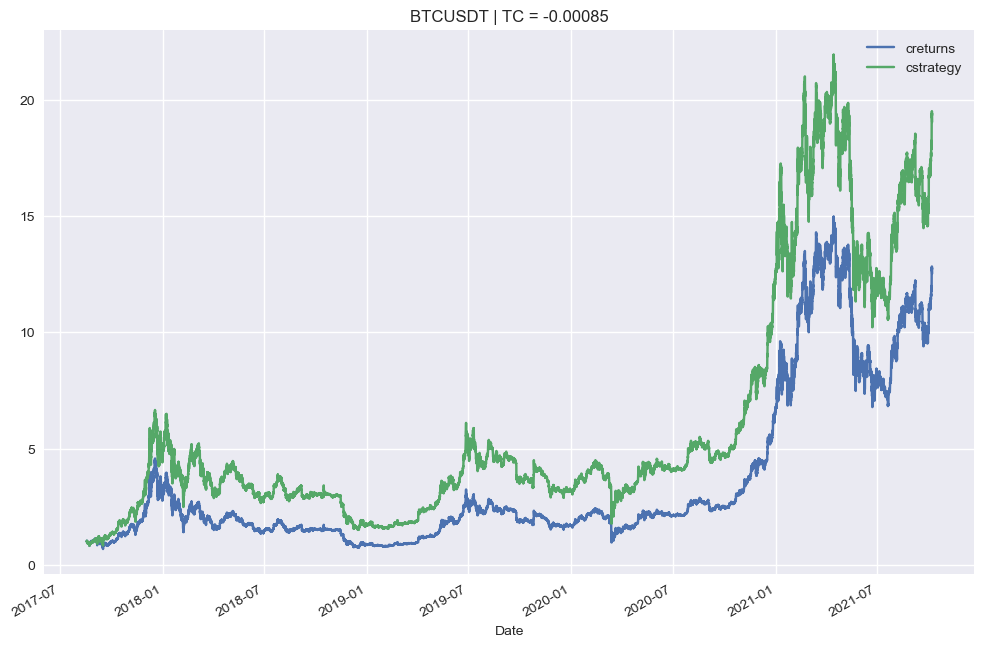

In [32]:
tester.plot_results()

In [33]:
tester.results

,Close,Volume,returns,vol_ch,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,1,NaN,0.0,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,-0.708335,1,0.001505,0.0,1.001506,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,-1.167460,1,0.002090,0.0,1.003602,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,-0.486810,1,0.005912,0.0,1.009552,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,-1.518955,1,0.002457,0.0,1.012036,1.012036
...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,0.439863,1,-0.006146,0.0,12.703161,19.317417
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,-0.233129,1,-0.003690,0.0,12.656373,19.246268
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,0.848040,1,0.004058,0.0,12.707839,19.324531


In [34]:
return_thresh = tester.return_thresh
return_thresh

0.008231867023808183

In [35]:
volume_thresh = tester.volume_thresh
volume_thresh

array([-0.72895253, -0.37604441])

In [36]:
tester.test_strategy(thresh=(return_thresh, volume_thresh[0], volume_thresh[1]))

SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = BTCUSDT | THRESHOLDS = 0.00823, [-0.72895 -0.37604]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         19.056163
Multiple (Buy-and-Hold):     12.53136
--------------------------------------
Out-/Underperformance:       6.524803


CAGR:                        1.03805
Annualized Mean:             0.712013
Annualized Std:              0.888775
Sharpe Ratio:                1.167957


In [37]:
tester.optimize_strategy(return_range=(85, 98, 1),
                         vol_low_range=(2, 16, 1),
                         vol_high_range=(16, 35, 1))

Return_Perc: 94 | Volume_Perc: [12, 27] | Multiple: 30.04924
SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = BTCUSDT | THRESHOLDS = 0.01168, [-0.5182  -0.28115]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         30.049242
Multiple (Buy-and-Hold):     12.53136
--------------------------------------
Out-/Underperformance:       17.517882


CAGR:                        1.275079
Annualized Mean:             0.822038
Annualized Std:              0.893157
Sharpe Ratio:                1.427608


In [40]:
tester.results_overview.nlargest(20, "performance")

,returns,vol_low,vol_high,performance
2595,94,12,27,30.049242
2596,94,12,28,29.118324
2329,93,12,27,28.758840
2576,94,11,27,28.607623
2599,94,12,31,28.347644
2865,95,12,31,28.250187
2291,93,10,27,28.126993
2310,93,11,27,28.089283
2861,95,12,27,28.025133
2063,92,12,27,28.011543


In [41]:
tester.results

,Close,Volume,returns,vol_ch,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,1,NaN,0.0,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,-0.708335,1,0.001505,0.0,1.001506,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,-1.167460,1,0.002090,0.0,1.003602,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,-0.486810,1,0.005912,0.0,1.009552,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,-1.518955,1,0.002457,0.0,1.012036,1.012036
...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,0.439863,1,-0.006146,0.0,12.703161,30.461207
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,-0.233129,1,-0.003690,0.0,12.656373,30.349014
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,0.848040,1,0.004058,0.0,12.707839,30.472427


## 백테스팅, 포워드 테스팅

2가지 주요 문제
* 데이터를 염탐, 과적합 문제: 해당 파라미터가 새로운 데이터에 잘 맞는가?
* 미래 편향: 분석 첫 날부터 모든 미래의 가격과 거래량을 사용한다.

해결 방법
* 몇달, 몇년을 기다리고 분석
* 과거 데이터를 나눠서 백테스팅 셋에 저장하고 전략 최적화, 최적화된 전략을 포워드 테스팅 셋에서 테스트

In [42]:
filepath = "bitcoin.csv"
symbol = "BTCUSDT"
start = "2017-08-17"
end = "2020-12-31"
tc = -0.00085

In [43]:
tester = Long_Only_Backtester(filepath, symbol, start, end, tc)
tester

Long_Only_Backtester(symbol = BTCUSDT, start = 2017-08-17, end = 2020-12-31)

In [44]:
tester.optimize_strategy((85, 98, 1), (2, 16, 1), (16, 35, 1))

Return_Perc: 94 | Volume_Perc: [12, 28] | Multiple: 17.68849
SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = BTCUSDT | THRESHOLDS = 0.01107, [-0.52736 -0.27342]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         17.688488
Multiple (Buy-and-Hold):     6.712641
--------------------------------------
Out-/Underperformance:       10.975847


CAGR:                        1.343699
Annualized Mean:             0.851759
Annualized Std:              0.887773
Sharpe Ratio:                1.513561


In [45]:
many_results = tester.results_overview
many_results

,returns,vol_low,vol_high,performance
0,85,2,16,9.508650
1,85,2,17,10.473487
2,85,2,18,11.026611
3,85,2,19,11.934646
4,85,2,20,12.115648
...,...,...,...,...
3453,97,15,30,8.572045
3454,97,15,31,9.262247
3455,97,15,32,8.490958
3456,97,15,33,7.860362


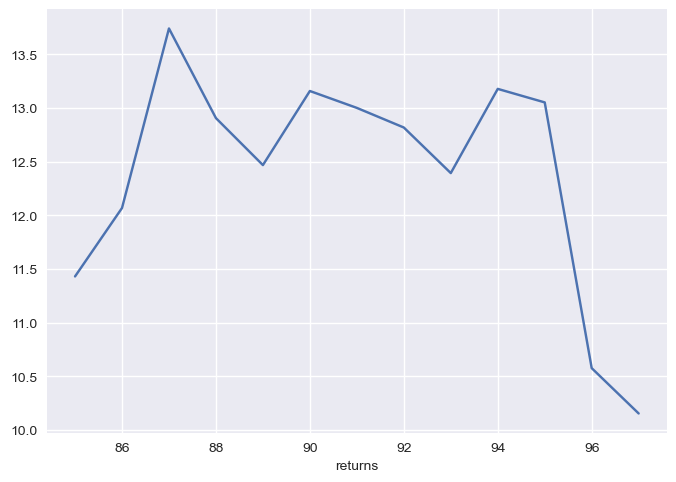

In [49]:
many_results.groupby("returns").performance.mean().plot()
plt.show()

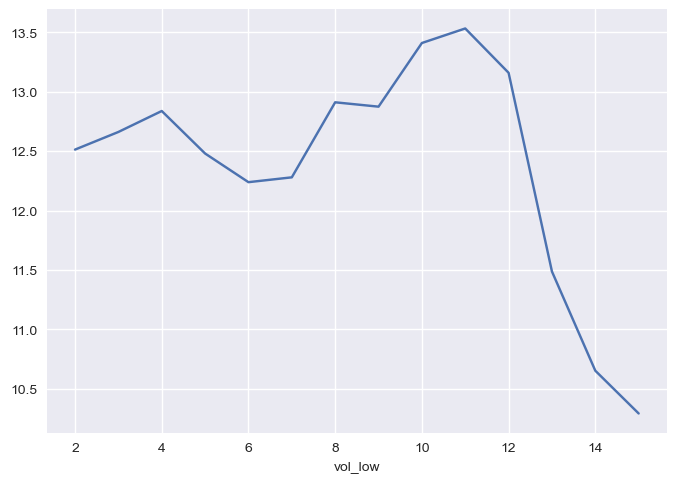

In [50]:
many_results.groupby("vol_low").performance.mean().plot()
plt.show()

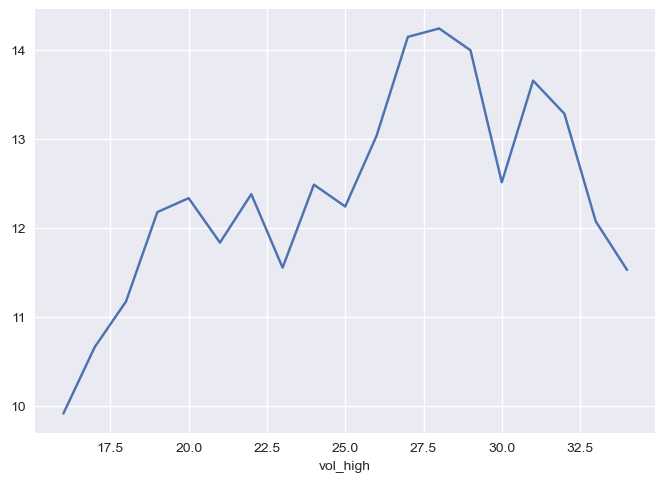

In [51]:
many_results.groupby("vol_high").performance.mean().plot()
plt.show()

In [52]:
tester.test_strategy((94, 11, 28))

SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = BTCUSDT | THRESHOLDS = 0.01107, [-0.55039 -0.27342]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         17.284017
Multiple (Buy-and-Hold):     6.712641
--------------------------------------
Out-/Underperformance:       10.571376


CAGR:                        1.327681
Annualized Mean:             0.844901
Annualized Std:              0.887162
Sharpe Ratio:                1.496549


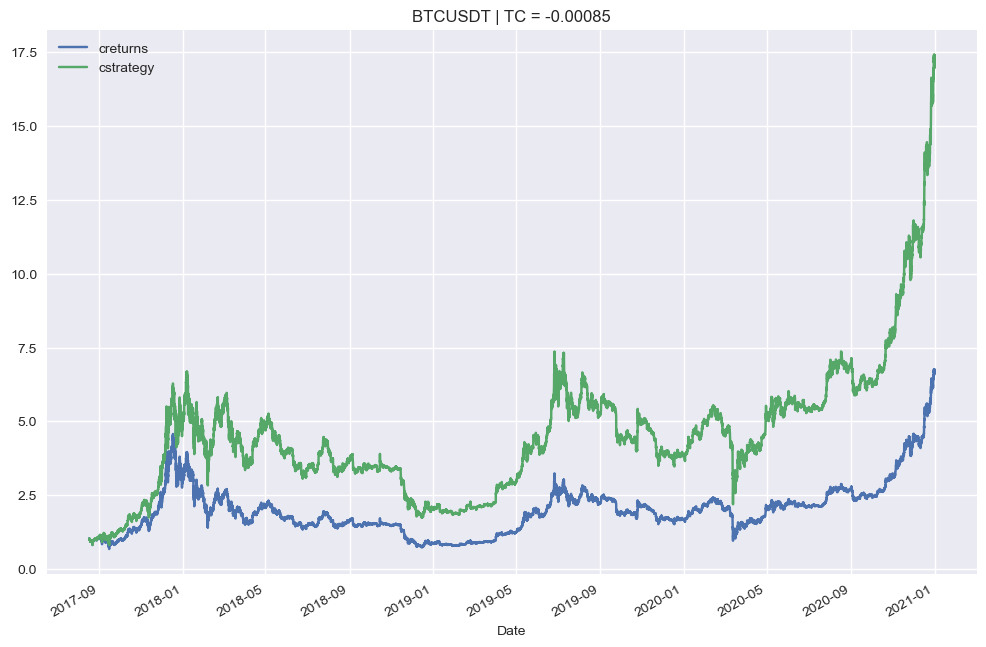

In [53]:
tester.plot_results()

In [54]:
return_thresh = tester.return_thresh
return_thresh

0.011069826844302733

In [55]:
volume_thresh = tester.volume_thresh
volume_thresh

array([-0.55039207, -0.27342444])

## 포워드 테스팅(2021-01-01 부터 시작)

In [56]:
filepath = "bitcoin.csv"
symbol = "BTCUSDT"
start = "2021-01-01"
end = "2021-10-07"
tc = -0.00085

In [57]:
tester = Long_Only_Backtester(filepath, symbol, start, end, tc)
tester

Long_Only_Backtester(symbol = BTCUSDT, start = 2021-01-01, end = 2021-10-07)

In [58]:
tester.test_strategy(thresh=(return_thresh, volume_thresh[0], volume_thresh[1]))

SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = BTCUSDT | THRESHOLDS = 0.01107, [-0.55039 -0.27342]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.685544
Multiple (Buy-and-Hold):     1.862227
--------------------------------------
Out-/Underperformance:       -0.176683


CAGR:                        0.980771
Annualized Mean:             0.683588
Annualized Std:              0.911607
Sharpe Ratio:                1.075871


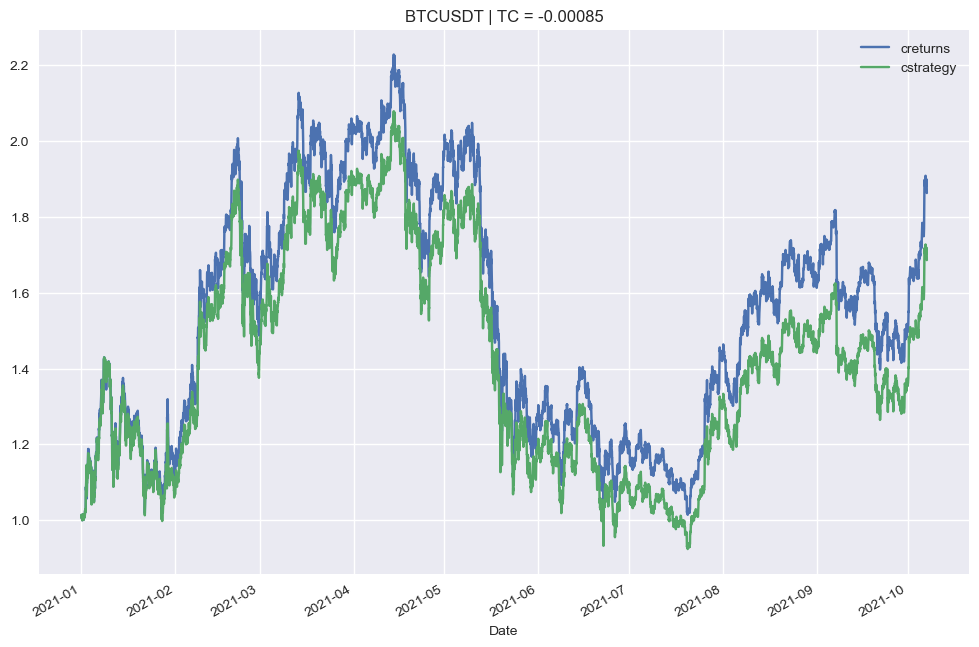

In [59]:
tester.plot_results()

In [60]:
tester.results.position.value_counts()

1    6635
0      58
Name: position, dtype: int64

**백테스팅과 포워드테스팅의 성과가 다른 이유**

* 데이터 염탐, 과적합(부분)
* 미래 편향(부분)

In [61]:
tester.optimize_strategy((85, 98, 1), (5, 15, 1), (15, 35, 1))

Return_Perc: 91 | Volume_Perc: [10, 15] | Multiple: 2.0269
SIMPLE PRICE & VOLUME STRATEGY | INSTRUMENT = BTCUSDT | THRESHOLDS = 0.01094, [-0.5274  -0.42192]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         2.026904
Multiple (Buy-and-Hold):     1.862227
--------------------------------------
Out-/Underperformance:       0.164677


CAGR:                        1.521666
Annualized Mean:             0.925058
Annualized Std:              0.917706
Sharpe Ratio:                1.658119


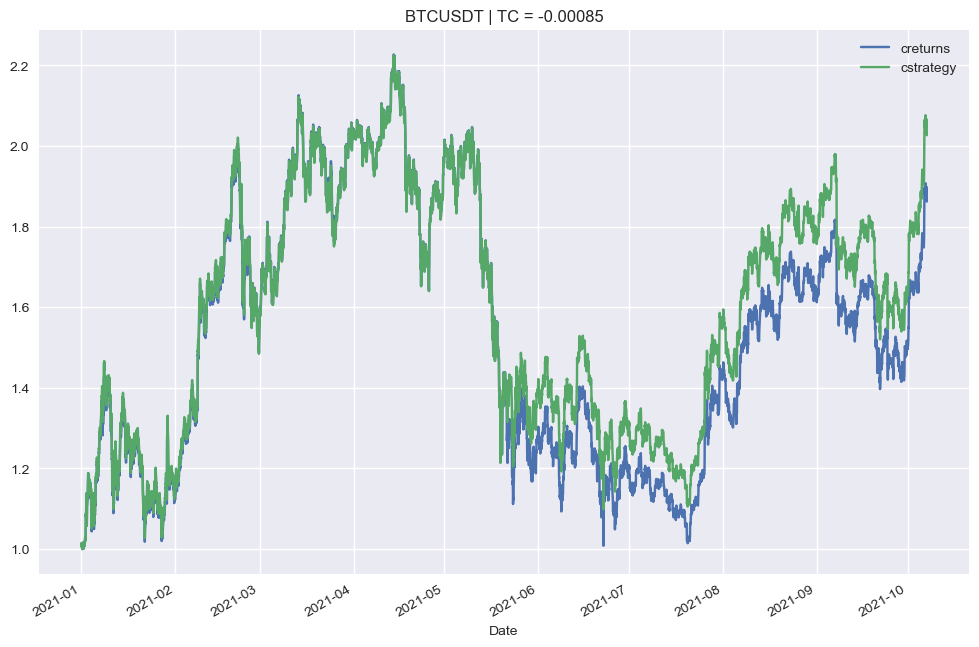

In [62]:
tester.plot_results()

* 전반적인 상황이 변화한다(패턴은 시간이 지나면 바뀔 수 있다)
* 전략이 충분히 강력하지 않다